# PROJET FRAUD

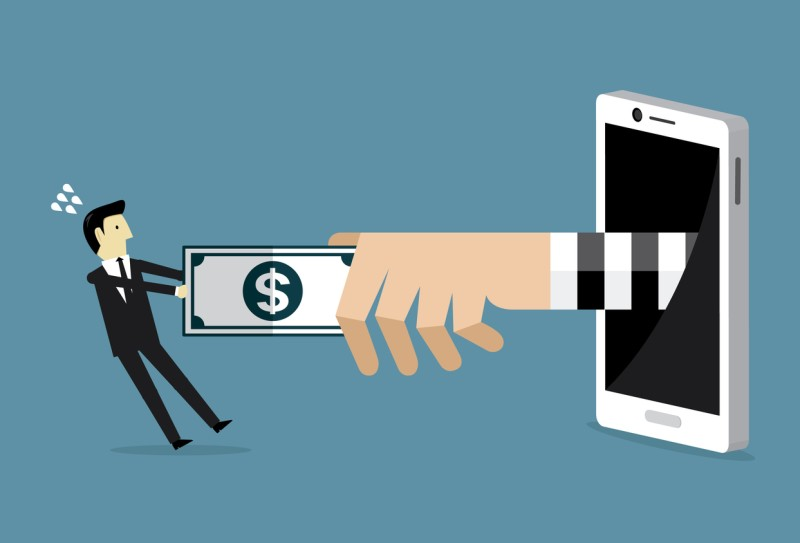

## Import des données

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
country = pd.read_csv('IpAddress_to_Country.csv')
fraud = pd.read_csv('Fraud_Data.csv')

## Flag des IP par pays 

In [4]:
country.describe(include='all')

,lower_bound_ip_address,upper_bound_ip_address,country
count,1.388460e+05,1.388460e+05,138846
unique,NaN,NaN,235
top,NaN,NaN,United States
freq,NaN,NaN,46868
mean,2.724532e+09,2.724557e+09,NaN
std,8.975215e+08,8.974979e+08,NaN
min,1.677722e+07,1.677747e+07,NaN
25%,1.919930e+09,1.920008e+09,NaN
50%,3.230887e+09,3.230888e+09,NaN
75%,3.350465e+09,3.350466e+09,NaN


In [5]:
fraud.describe(include='all')

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000
unique,NaN,151112,150679,NaN,137956,3,5,2,NaN,NaN,NaN
top,NaN,2015-06-19 04:36:27,2015-09-10 09:04:53,NaN,EQYVNEGOFLAWK,SEO,Chrome,M,NaN,NaN,NaN
freq,NaN,1,3,NaN,20,60615,61432,88293,NaN,NaN,NaN
mean,200171.040970,NaN,NaN,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646
std,115369.285024,NaN,NaN,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,0.291336
min,2.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000
25%,100642.500000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000
50%,199958.000000,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000
75%,300054.000000,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000


In [6]:
def ip_country(ip):
    try:
        return country.country[(country.lower_bound_ip_address<= ip)&(country.upper_bound_ip_address>= ip)].iloc[0]
    except IndexError:
        return 'NaN'

In [7]:
fraud['country'] =fraud['ip_address'].apply(ip_country)


## DataSet Exploration

In [8]:
fraud.describe(include = 'all')

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000,151112
unique,NaN,151112,150679,NaN,137956,3,5,2,NaN,NaN,NaN,182
top,NaN,2015-06-19 04:36:27,2015-09-10 09:04:53,NaN,EQYVNEGOFLAWK,SEO,Chrome,M,NaN,NaN,NaN,United States
freq,NaN,1,3,NaN,20,60615,61432,88293,NaN,NaN,NaN,58049
mean,200171.040970,NaN,NaN,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646,NaN
std,115369.285024,NaN,NaN,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,0.291336,NaN
min,2.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000,NaN
25%,100642.500000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000,NaN
50%,199958.000000,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000,NaN
75%,300054.000000,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000,NaN


In [9]:
fraud.columns = ['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'fraud',
       'country']

Variable Catégorielle: device_id, source, browser, sex, ip_address, country
Variable Numérique: purchase_value, age
Variable Cible: class
    
 - user_id: valeurs uniques
 - device_id: valeurs non uniques
 - Ip: valeurs non uniques

In [10]:
print ("Taux de Fraude : {0:.2f}%". 
                    format(fraud['fraud'].value_counts()[1]/fraud.shape[0]*100)) 

Taux de Fraude : 9.36%


In [11]:
fraud.device_id.nunique()

137956

In [12]:
Categorielle = ['device_id', 'source', 'browser', 'sex', 'ip_address', 'country']
Numerique = ['purchase_value', 'age']


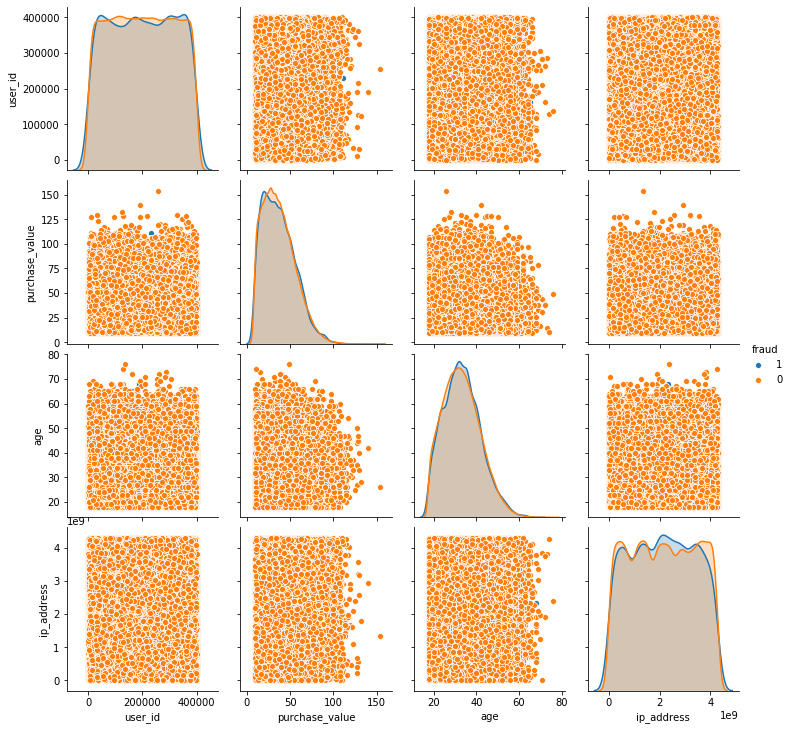

In [13]:
sns.pairplot(fraud,hue='fraud',hue_order=[1,0])

# BaseLine

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [15]:
database = fraud.loc[:,['source', 'browser', 'sex','purchase_value', 'age','fraud']]
BaseLine_feature = database.iloc[:,:-1]
BaseLine_target = database.iloc[:,-1]

In [16]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   source          151112 non-null  object
 1   browser         151112 non-null  object
 2   sex             151112 non-null  object
 3   purchase_value  151112 non-null  int64 
 4   age             151112 non-null  int64 
 5   fraud           151112 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 6.9+ MB


In [17]:
from sklearn.model_selection import train_test_split

X_BL_train,X_BL_test,Y_BL_train,Y_BL_test = train_test_split(BaseLine_feature,BaseLine_target,test_size=0.2,random_state=0,stratify=BaseLine_target)

In [18]:
BL_cat = [0, 1, 2]
BL_num =[3, 4]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()
label_encoder = LabelEncoder()
features_encoder = ColumnTransformer(transformers = [('cat', categorical_transformer,BL_cat),    
        ('num', numeric_transformer,BL_num)])

X_BL_train = features_encoder.fit_transform(X_BL_train)
X_BL_test = features_encoder.transform(X_BL_test)

Y_BL_train = label_encoder.fit_transform(Y_BL_train)
Y_BL_test = label_encoder.transform(Y_BL_test)


In [19]:
from sklearn.tree import DecisionTreeClassifier
BL_classifier = DecisionTreeClassifier()
BL_classifier.fit(X_BL_train,Y_BL_train)
Y_BL_test_pred = BL_classifier.predict(X_BL_test) 


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_BL_test,Y_BL_test_pred))
print(confusion_matrix(Y_BL_test,Y_BL_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     27393
           1       0.55      0.48      0.51      2830

    accuracy                           0.91     30223
   macro avg       0.75      0.72      0.73     30223
weighted avg       0.91      0.91      0.91     30223

[[26269  1124]
 [ 1466  1364]]


# Feature Engineering

### Management des dates

In [21]:
fraud['signup_time'] = pd.to_datetime(fraud['signup_time'])
fraud['purchase_time'] = pd.to_datetime(fraud['purchase_time'])
fraud['durée'] = [(fraud.purchase_time[x]-fraud.signup_time[x]).seconds for x in range(fraud.shape[0])]
fraud['purchase_hour']=fraud['purchase_time'].apply(lambda x: x.hour)
fraud['purchase_month']=fraud['purchase_time'].apply(lambda x: x.month)
fraud['purchase_day']=fraud['purchase_time'].apply(lambda x: x.weekday())


In [22]:
def moment(x):
    if x < 4:
        return'nuit'
    elif x<8:
        return 'matin'
    elif x<12:
        return 'journée'
    elif x<16:
        return 'après-midi'
    elif x<20:
        return 'crépuscule'
    else: return 'soirée'

In [23]:
fraud['purchase_hour_bins'] = fraud['purchase_hour'].apply(moment)

### Mananagement des Devices

In [71]:
freq_tab = pd.DataFrame(fraud['device_id'].groupby(fraud.device_id).count())
fraud['frq_device'] = fraud.device_id.apply(lambda x: freq_tab.loc[x,:])

In [122]:
fraud.loc[fraud['fraud'] == 1,['fraud','frq_device']].describe()

,fraud,frq_device
count,14151.0,14151.000000
mean,1.0,7.145926
std,0.0,5.794476
min,1.0,1.000000
25%,1.0,1.000000
50%,1.0,8.000000
75%,1.0,12.000000
max,1.0,20.000000


In [123]:
fraud.loc[fraud['fraud'] == 0,['fraud','frq_device']].describe()

,fraud,frq_device
count,136961.0,136961.000000
mean,0.0,1.120071
std,0.0,0.828709
min,0.0,1.000000
25%,0.0,1.000000
50%,0.0,1.000000
75%,0.0,1.000000
max,0.0,20.000000


In [152]:
def frequence_device(frq):
    if frq>=3:
        return 'Frequent User'
    elif frq>1:
        return 'Returning User'
    else: return 'New User'

In [153]:
fraud['returning_cust'] = fraud.frq_device.apply(frequence_device)

In [167]:
x = fraud.groupby(['ip_address','device_id']).count().sort_values(by = 'user_id',ascending=False)
x.head(10)

,,user_id,signup_time,purchase_time,purchase_value,source,browser,sex,age,fraud,country,durée,purchase_hour,purchase_month,purchase_day,purchase_hour_bins,frq_device,returning_cust
ip_address,device_id,,,,,,,,,,,,,,,,,
1.502818e+09,ZUSVMDEZRBDTX,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
5.760609e+08,KIPFSCNUGOLDP,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
3.874758e+09,ITUMJCKWEYNDD,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
2.050964e+09,NGQCKIADMZORL,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
2.937899e+09,BWSMVSLCJXMCM,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
2.586669e+09,CDFXVYHOIHPYP,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
3.484934e+08,CQTUVBYIWWWBC,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
1.800550e+09,IGKYVZDBEGALB,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
3.058785e+09,SDJQRPKXQFBED,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19


In [178]:
x = fraud.loc[fraud['device_id'] == 'ZUSVMDEZRBDTX', ['ip_address']]
x.ip_address.value_counts()

1.502818e+09    20
Name: ip_address, dtype: int64

## Model Predictif

### PreProcessing

In [180]:
fraud.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'fraud',
       'country', 'durée', 'purchase_hour', 'purchase_month', 'purchase_day',
       'purchase_hour_bins', 'frq_device', 'returning_cust'],
      dtype='object')

In [191]:
new_fraud = fraud.loc[:,['purchase_value','age','durée', 'source', 'browser', 'sex', 'ip_address', 'purchase_month', 'purchase_day',
       'purchase_hour_bins', 'returning_cust','fraud']]

In [192]:
X = new_fraud.iloc[:,:-1]
Y = new_fraud.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)

In [194]:
new_cat = [3,4,7,8,9,10]
new_num = [0,1,2]
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()
label_encoder = LabelEncoder()
features_encoder = ColumnTransformer(transformers = [('cat', categorical_transformer,new_cat),    
        ('num', numeric_transformer,new_num)])

X = new_fraud.iloc[:,:-1]
Y = new_fraud.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)

X_train = features_encoder.fit_transform(X_train)
X_test = features_encoder.transform(X_test)

Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.transform(Y_test)

### BaseLine Post Features Engineering

In [195]:
new_classifier = DecisionTreeClassifier()
new_classifier.fit(X_train,Y_train)
Y_test_pred = new_classifier.predict(X_test) 



In [196]:
print(classification_report(Y_BL_test,Y_BL_test_pred))
print(confusion_matrix(Y_BL_test,Y_BL_test_pred))
print(classification_report(Y_test,Y_test_pred))
print(confusion_matrix(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     27393
           1       0.55      0.48      0.51      2830

    accuracy                           0.91     30223
   macro avg       0.75      0.72      0.73     30223
weighted avg       0.91      0.91      0.91     30223

[[26269  1124]
 [ 1466  1364]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     27393
           1       0.54      0.60      0.57      2830

    accuracy                           0.92     30223
   macro avg       0.75      0.78      0.76     30223
weighted avg       0.92      0.92      0.92     30223

[[25947  1446]
 [ 1118  1712]]


### BOOSTING

In [209]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
classifier = XGBClassifier(n_jobs = -1, random_state =42)
params = {'max_depth' : [2,3,4],
          "learning_rate" : [0.1,0.2,0.05],
          "n_estimators" : [10,50,100]}

grid_classification =  GridSearchCV(estimator=classifier,param_grid= params, cv = 10, n_jobs =-1, verbose= 30)



In [210]:
grid_classification.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",grid_classification.best_params_)
print("accuracy :",grid_classification.best_score_)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  2.0min
[Paralle

tuned hpyerparameters :(best parameters)  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 10}
accuracy : 0.9563483772652628


In [216]:
Y_train_pred = grid_classification.predict(X_train)
Y_test_pred = grid_classification.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98    109568
           1       1.00      0.53      0.70     11321

    accuracy                           0.96    120889
   macro avg       0.98      0.77      0.84    120889
weighted avg       0.96      0.96      0.95    120889

[[109566      2]
 [  5275   6046]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27393
           1       1.00      0.55      0.71      2830

    accuracy                           0.96     30223
   macro avg       0.98      0.77      0.84     30223
weighted avg       0.96      0.96      0.95     30223

[[27393     0]
 [ 1276  1554]]


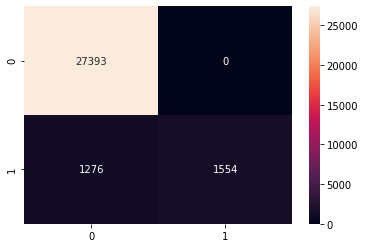

In [218]:
cm = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cm, annot=True, fmt="d")

print(classification_report(Y_train,Y_train_pred))
print(confusion_matrix(Y_train,Y_train_pred))
print(classification_report(Y_test,Y_test_pred))
print(confusion_matrix(Y_test,Y_test_pred))